In [6]:
# Imports libraries

from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
import nltk
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/parthamandal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/parthamandal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/parthamandal/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/parthamandal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/parthamandal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [7]:
# Import txt file

with open('alice_article_wiki.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

In [8]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent)

['    Alice\'s Adventures in Wonderland - Wikipedia                                    Jump to content        Main menu      Main menu move to sidebar hide    \t\tNavigation \t   Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us      \t\tContribute \t   HelpLearn to editCommunity portalRecent changesUpload fileSpecial pages                    Search            Search                       Appearance                 Donate  Create account  Log in         Personal tools      Donate Create account Log in      \t\tPages for logged out editors learn more    ContributionsTalk                             Contents move to sidebar hide     (Top)      1 Background     Toggle Background subsection      1.1 "All in the golden afternoon..."         1.2 Manuscript: Alice\'s Adventures Under Ground           2 Plot         3 Characters     Toggle Characters subsection      3.1 Character allusions           4 Poems and songs         5 Writing style and themes     Toggle Writing st

In [9]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word)

['Alice', "'s", 'Adventures', 'in', 'Wonderland', '-', 'Wikipedia', 'Jump', 'to', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'to', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'to', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'in', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'in', 'Pages', 'for', 'logged', 'out', 'editors', 'learn', 'more', 'ContributionsTalk', 'Contents', 'move', 'to', 'sidebar', 'hide', '(', 'Top', ')', '1', 'Background', 'Toggle', 'Background', 'subsection', '1.1', '``', 'All', 'in', 'the', 'golden', 'afternoon', '...', "''", '1.2', 'Manuscript', ':', 'Alice', "'s", 'Adventures', 'Under', 'Ground', '2', 'Plot', '3', 'Characters', 'Toggle', 'Characters', 'subsection', '3.1', 'Character', 'allusions', '4', 'Poems', 'and', 'songs', '5', 'Writin

In [10]:
# frequency distribution

from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words)

<FreqDist with 3196 samples and 12743 outcomes>


In [11]:
dist_words.most_common(10)

[('.', 763),
 (',', 551),
 ('the', 429),
 ('Alice', 301),
 ('in', 285),
 ('(', 241),
 (')', 241),
 ('of', 235),
 ("'s", 207),
 ('[', 200)]

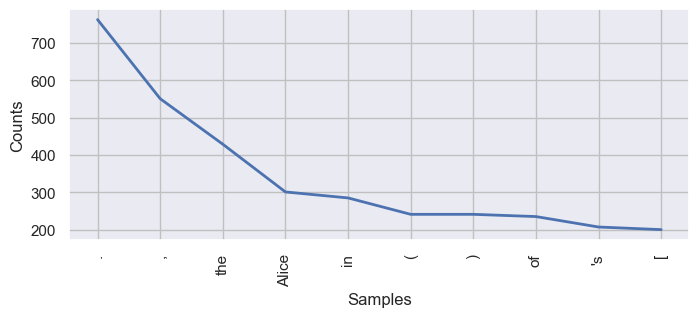

In [12]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words.plot(10,cumulative = False)
plt.show()

In [13]:
# Defining stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'don', 'have', "i'll", 'then', 'having', 's', 'how', "didn't", 'themselves', 're', 'above', 'won', 'whom', 'out', 'do', 'itself', 'or', 'such', 'the', 'am', 'when', 'after', 'his', "mustn't", 'are', "don't", 'ma', 'in', "we're", 'had', 'her', "she'd", "couldn't", 'needn', 'will', 'before', "they're", 'than', 'yourselves', "isn't", "i've", 'll', "hadn't", "we'll", 'during', 'my', 'some', "weren't", 'doing', "they'd", 'isn', 'were', 'does', 'y', 'that', 'she', "they'll", 't', 'all', 'wasn', 'him', 'we', "they've", 'between', 'these', 'been', 'aren', 'herself', 'into', "that'll", 'your', 'very', "he'll", "she'll", 'again', 'now', 'of', "won't", 'd', 'both', "it's", "wouldn't", 'few', 'each', 'mustn', "we'd", 'once', 'shouldn', 'haven', 'about', 'didn', "mightn't", "you'll", 'here', 'which', 'not', "should've", 'but', 'shan', 'so', "he'd", 'weren', 'most', 'more', 'against', 'himself', 'a', 'has', 'is', 'what', 'who', 'you', 'until', 'its', 'if', 'their', 'be', 'this', "shouldn't", 'just'

In [14]:
# Removing stopwords in words

filtered_words = [] 
for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [15]:
filtered_words

['Alice',
 "'s",
 'Adventures',
 'Wonderland',
 '-',
 'Wikipedia',
 'Jump',
 'content',
 'Main',
 'menu',
 'Main',
 'menu',
 'move',
 'sidebar',
 'hide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSpecial',
 'pages',
 'Search',
 'Search',
 'Appearance',
 'Donate',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Donate',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'ContributionsTalk',
 'Contents',
 'move',
 'sidebar',
 'hide',
 '(',
 'Top',
 ')',
 '1',
 'Background',
 'Toggle',
 'Background',
 'subsection',
 '1.1',
 '``',
 'All',
 'golden',
 'afternoon',
 '...',
 "''",
 '1.2',
 'Manuscript',
 ':',
 'Alice',
 "'s",
 'Adventures',
 'Under',
 'Ground',
 '2',
 'Plot',
 '3',
 'Characters',
 'Toggle',
 'Characters',
 'subsection',
 '3.1',
 'Character',
 'allusions',
 '4',
 'Poems',
 'songs',
 '5',
 'Wr

In [16]:
# Create a new FreqDist for filtered–words

Dist_words_filter = FreqDist(filtered_words)
print (Dist_words_filter)

<FreqDist with 3095 samples and 10220 outcomes>


In [17]:
# Substitute all punctuation marks with a space

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        " ",        # Replace all non-letters with spaces
                        str(filtered_words))

In [18]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)
print (tokenized_word_2)

['Alice', 's', 'Adventures', 'Wonderland', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Background', 'Toggle', 'Background', 'subsection', 'All', 'golden', 'afternoon', 'Manuscript', 'Alice', 's', 'Adventures', 'Under', 'Ground', 'Plot', 'Characters', 'Toggle', 'Characters', 'subsection', 'Character', 'allusions', 'Poems', 'songs', 'Writing', 'style', 'themes', 'Toggle', 'Writing', 'style', 'themes', 'subsection', 'Symbolism', 'Language', 'Mathematics', 'Eating', 'devouring', 'Nonsense', 'Rules', 'games', '

In [19]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2)
print (dist_words_filter_2)

<FreqDist with 2676 samples and 6609 outcomes>


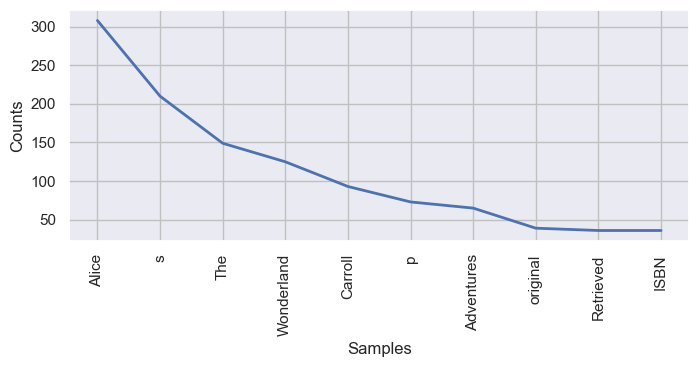

In [20]:
# Frequency Distribution Plot

plt.figure(figsize=(8, 3))
dist_words_filter_2.plot(10,cumulative = False)
plt.show()

In [21]:
new_stopwords = ["And", "Then", 'n', 't', 's', 'The', 'b', 'l', 'g', 'T', 'B',
 'm', 'e']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

In [22]:
filtered

['Alice',
 'Adventures',
 'Wonderland',
 'Wikipedia',
 'Jump',
 'content',
 'Main',
 'menu',
 'Main',
 'menu',
 'move',
 'sidebar',
 'hide',
 'Navigation',
 'Main',
 'pageContentsCurrent',
 'eventsRandom',
 'articleAbout',
 'WikipediaContact',
 'us',
 'Contribute',
 'HelpLearn',
 'editCommunity',
 'portalRecent',
 'changesUpload',
 'fileSpecial',
 'pages',
 'Search',
 'Search',
 'Appearance',
 'Donate',
 'Create',
 'account',
 'Log',
 'Personal',
 'tools',
 'Donate',
 'Create',
 'account',
 'Log',
 'Pages',
 'logged',
 'editors',
 'learn',
 'ContributionsTalk',
 'Contents',
 'move',
 'sidebar',
 'hide',
 'Top',
 'Background',
 'Toggle',
 'Background',
 'subsection',
 'All',
 'golden',
 'afternoon',
 'Manuscript',
 'Alice',
 'Adventures',
 'Under',
 'Ground',
 'Plot',
 'Characters',
 'Toggle',
 'Characters',
 'subsection',
 'Character',
 'allusions',
 'Poems',
 'songs',
 'Writing',
 'style',
 'themes',
 'Toggle',
 'Writing',
 'style',
 'themes',
 'subsection',
 'Symbolism',
 'Language',

In [23]:
%%time
text = TextBlob(str(filtered))

CPU times: user 7.2 ms, sys: 216 μs, total: 7.42 ms
Wall time: 7.37 ms


In [24]:
text

TextBlob("['Alice', 'Adventures', 'Wonderland', 'Wikipedia', 'Jump', 'content', 'Main', 'menu', 'Main', 'menu', 'move', 'sidebar', 'hide', 'Navigation', 'Main', 'pageContentsCurrent', 'eventsRandom', 'articleAbout', 'WikipediaContact', 'us', 'Contribute', 'HelpLearn', 'editCommunity', 'portalRecent', 'changesUpload', 'fileSpecial', 'pages', 'Search', 'Search', 'Appearance', 'Donate', 'Create', 'account', 'Log', 'Personal', 'tools', 'Donate', 'Create', 'account', 'Log', 'Pages', 'logged', 'editors', 'learn', 'ContributionsTalk', 'Contents', 'move', 'sidebar', 'hide', 'Top', 'Background', 'Toggle', 'Background', 'subsection', 'All', 'golden', 'afternoon', 'Manuscript', 'Alice', 'Adventures', 'Under', 'Ground', 'Plot', 'Characters', 'Toggle', 'Characters', 'subsection', 'Character', 'allusions', 'Poems', 'songs', 'Writing', 'style', 'themes', 'Toggle', 'Writing', 'style', 'themes', 'subsection', 'Symbolism', 'Language', 'Mathematics', 'Eating', 'devouring', 'Nonsense', 'Rules', 'games', '

In [25]:
tags_list = text.tags

In [26]:
tags_list

[('[', 'JJ'),
 ("'Alice", 'NNP'),
 ("'", 'POS'),
 ("'Adventures", 'NNS'),
 ("'", 'POS'),
 ("'Wonderland", 'NNP'),
 ("'", 'POS'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'Jump", 'NNP'),
 ("'", 'POS'),
 ("'content", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'menu", 'NNP'),
 ("'", 'POS'),
 ("'move", 'NNP'),
 ("'", 'POS'),
 ("'sidebar", 'NNP'),
 ("'", 'POS'),
 ("'hide", 'NNP'),
 ("'", 'POS'),
 ("'Navigation", 'NN'),
 ("'pageContentsCurrent", 'NNP'),
 ("'", 'POS'),
 ("'eventsRandom", 'NNP'),
 ("'", 'POS'),
 ("'articleAbout", 'IN'),
 ("'WikipediaContact", 'NNP'),
 ("'", 'POS'),
 ("'us", 'NNP'),
 ("'", 'POS'),
 ("'HelpLearn", 'NNP'),
 ("'", 'POS'),
 ("'editCommunity", 'NNP'),
 ("'", 'POS'),
 ("'portalRecent", 'NNP'),
 ("'", 'POS'),
 ("'fileSpecial", 'NNP'),
 ("'", 'POS'),
 ("'pages", 'NNS'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Search", 'NNP'),
 ("'", 'POS'),
 ("'Appearance", 'NN'),
 ("'Donate", 'NNP'),
 ("'", 'POS'),
 ("'Create", 'NNP'),
 ("'", 'POS'),
 

In [27]:
df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top20=df_t.nlargest(20, 'Words')

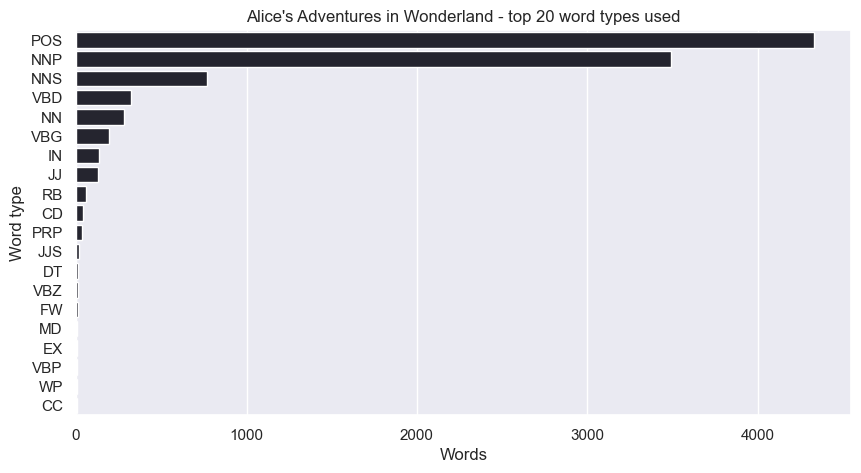

In [28]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
      sns.barplot(x = "Words", y = "Word type",
     saturation = 0.9, data = top20).set_title("Alice's Adventures in Wonderland - top 20 word types used")

In [29]:
df = df_text[(df_text['Word type'] == "NNP") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNS")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top10 = y.nlargest(10, 'Occurrences') 

In [30]:
top10

,Word,Occurrences
20,'Alice,308
904,'Wonderland,125
124,'Carroll,93
12,'Adventures,65
1418,'original,39
379,'ISBN,36
461,'Lewis,33
1745,A,32
1473,'pp,30
1004,'book,28


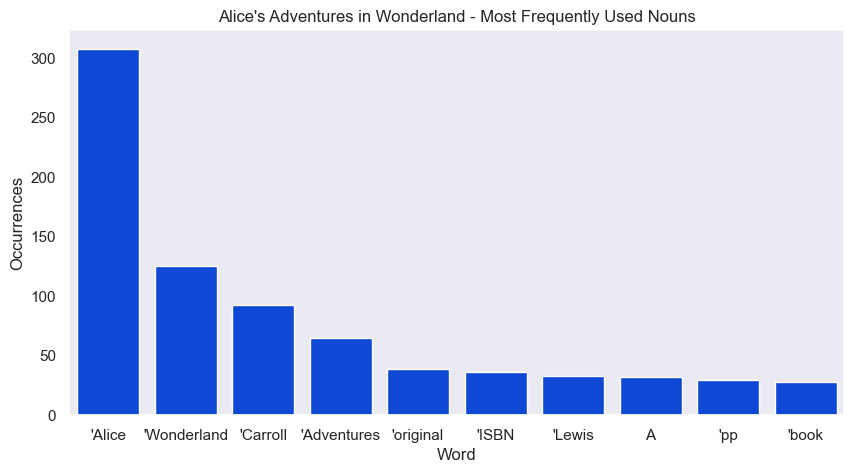

In [31]:
sns.set_theme(style="dark")
sns.set_palette(sns.color_palette(["xkcd:blue"]))
plt.figure(figsize=(10, 5))
sns.barplot(x="Word", y="Occurrences", data=top10, saturation=0.9)
plt.title("Alice's Adventures in Wonderland - Most Frequently Used Nouns")
plt.show()

In [32]:
listToStr = ' '.join([str(elem) for elem in filtered])

print(listToStr)


Alice Adventures Wonderland Wikipedia Jump content Main menu Main menu move sidebar hide Navigation Main pageContentsCurrent eventsRandom articleAbout WikipediaContact us Contribute HelpLearn editCommunity portalRecent changesUpload fileSpecial pages Search Search Appearance Donate Create account Log Personal tools Donate Create account Log Pages logged editors learn ContributionsTalk Contents move sidebar hide Top Background Toggle Background subsection All golden afternoon Manuscript Alice Adventures Under Ground Plot Characters Toggle Characters subsection Character allusions Poems songs Writing style themes Toggle Writing style themes subsection Symbolism Language Mathematics Eating devouring Nonsense Rules games Illustrations Publication history Toggle Publication history subsection Publication timeline Reception Adaptations influence Toggle Adaptations influence subsection Live performance Commemoration See also References Toggle References subsection Works cited External links T

In [44]:
# Create a count for the main characters

all_counts = Counter(re.sub(r'\W+', ' ', listToStr).split())

In [45]:
all_counts

Counter({'Alice': 308,
         'Wonderland': 125,
         'Carroll': 93,
         'p': 73,
         'Adventures': 65,
         'original': 39,
         'Retrieved': 36,
         'ISBN': 36,
         'Lewis': 33,
         'A': 32,
         'pp': 30,
         'Archived': 29,
         'book': 28,
         'edit': 28,
         'Glass': 26,
         'OCLC': 26,
         'Looking': 25,
         'Through': 24,
         'children': 23,
         'January': 23,
         'first': 22,
         'University': 20,
         'story': 20,
         'Tenniel': 20,
         'Liddell': 20,
         'Queen': 20,
         'New': 20,
         'fantasy': 18,
         'Press': 18,
         'edition': 17,
         'John': 17,
         'English': 16,
         'In': 16,
         'Hearts': 16,
         'Gardner': 16,
         'Under': 15,
         'Ground': 15,
         'illustrations': 15,
         'March': 15,
         'Hatter': 15,
         'manuscript': 14,
         'Douglas': 14,
         'White': 14,
       

In [58]:
chars = pd.read_csv("alice_characters.csv")

In [59]:
print(chars)

              character
0                 Alice
1      The White Rabbit
2             The Mouse
3              The Dodo
4              The Lory
5            The Eaglet
6              The Duck
7                   Pat
8       Bill the Lizard
9                 Puppy
10      The Caterpillar
11          The Duchess
12     The Cheshire Cat
13           The Hatter
14       The March Hare
15         The Dormouse
16  The Queen of Hearts
17   The King of Hearts
18  The Knave of Hearts
19          The Gryphon
20      The Mock Turtle


In [65]:
# Replace names with aliases

chars['character'] = chars['character'].replace('Bill the Lizard','Bill')
chars['character'] = chars['character'].replace('The Queen of Hearts','Queen')
chars['character'] = chars['character'].replace('The King of Hearts','King')
chars['character'] = chars['character'].replace('The Knave of Hearts','Knave')

In [66]:
chars['character_alias'] = chars['character'].apply(lambda x: x.rsplit(' ',1)[-1])

In [75]:
chars

,character,character_alias
0,Alice,Alice
1,The White Rabbit,Rabbit
2,The Mouse,Mouse
3,The Dodo,Dodo
4,The Lory,Lory
5,The Eaglet,Eaglet
6,The Duck,Duck
7,Pat,Pat
8,Bill,Bill
9,Puppy,Puppy


In [76]:
chars_list = chars['character_alias'].to_list()

In [78]:
dict_of_counts = {d : all_counts[d] for d in chars_list}

In [79]:
dict_of_counts

{'Alice': 308,
 'Rabbit': 9,
 'Mouse': 5,
 'Dodo': 5,
 'Lory': 2,
 'Eaglet': 2,
 'Duck': 2,
 'Pat': 4,
 'Bill': 3,
 'Puppy': 2,
 'Caterpillar': 5,
 'Duchess': 8,
 'Cat': 7,
 'Hatter': 15,
 'Hare': 4,
 'Dormouse': 4,
 'Queen': 20,
 'King': 6,
 'Knave': 3,
 'Gryphon': 4,
 'Turtle': 8}

In [80]:
#Search for the names from the list in the dictionary

dct = {v:[k] for v,k in dict_of_counts.items()}
df = pd.DataFrame(dct)

In [82]:
df = pd.DataFrame(list(dict_of_counts.items()), columns=["Word", "Occurrences"])


In [83]:
df

,Word,Occurrences
0,Alice,308
1,Rabbit,9
2,Mouse,5
3,Dodo,5
4,Lory,2
5,Eaglet,2
6,Duck,2
7,Pat,4
8,Bill,3
9,Puppy,2


In [84]:
df.shape

(21, 2)

In [88]:
print(df.columns)

Index(['Word', 'Occurrences'], dtype='object')


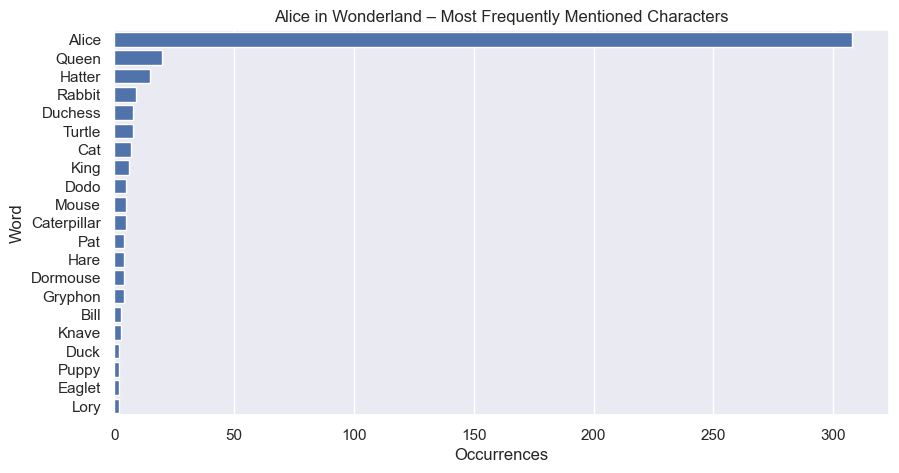

In [90]:
plt.figure(figsize=(10, 5))

# Optional: set dark style
sns.set_theme(style="darkgrid")

# Create the plot using the correct column names
sns.barplot(
    x="Occurrences",
    y="Word",
    saturation=0.9,
    data=df.sort_values("Occurrences", ascending=False)
).set_title("Alice in Wonderland – Most Frequently Mentioned Characters")

plt.show()


In [91]:
text_sent = TextBlob(str(filtered))
print(text_sent.sentiment)


Sentiment(polarity=0.09233648973547957, subjectivity=0.4176322312180903)
